# Preamble

## setup of environment

In [16]:
%ls

2d.py  main_torch.ipynb  README.md  source-code/  trained-models/  venv/


## pystrum

In [3]:
# !git clone https://github.com/adalca/pystrum

In [17]:
!pip install ./source-code/pystrum

Defaulting to user installation because normal site-packages is not writeable
Processing ./source-code/pystrum
  Preparing metadata (setup.py) ... done
  Created wheel for pystrum: filename=pystrum-0.2-py3-none-any.whl size=19536 sha256=7d1121fa5e25342eb01145dfb6995974474e9ac52401bad2cea4640e4087f61c
  Stored in directory: /tmp/pip-ephem-wheel-cache-imx5vm5g/wheels/b3/d6/83/861816a5837448474b9c938ad42ab72ef93e671ead16278a5a
Successfully built pystrum
  Attempting uninstall: pystrum
    Found existing installation: pystrum 0.1
    Uninstalling pystrum-0.1:
      Successfully uninstalled pystrum-0.1


## neurite

In [5]:
# !git clone https://github.com/adalca/neurite

In [18]:
!pip install ./source-code/neurite

Defaulting to user installation because normal site-packages is not writeable
Processing ./source-code/neurite
  Preparing metadata (setup.py) ... done
  Created wheel for neurite: filename=neurite-0.1-py3-none-any.whl size=105916 sha256=d5b8483e41764ef09182b2acdb63dc185a4a88ae03607d75cd22a859e8772104
  Stored in directory: /tmp/pip-ephem-wheel-cache-9zksrfwa/wheels/ec/d6/15/77502d21a17ad317abfae5caae4ffe9268b6d9a9511af16fbb
Successfully built neurite
  Attempting uninstall: neurite
    Found existing installation: neurite 0.1
    Uninstalling neurite-0.1:
      Successfully uninstalled neurite-0.1


## voxelmorph

In [7]:
# !git clone https://github.com/voxelmorph/voxelmorph

In [19]:
!pip install ./source-code/voxelmorph

Defaulting to user installation because normal site-packages is not writeable
Processing ./source-code/voxelmorph
  Preparing metadata (setup.py) ... done
  Created wheel for voxelmorph: filename=voxelmorph-0.1-py3-none-any.whl size=53386 sha256=5fb354922f5b7950372c4decdf36281a34cc160339d1961334a47a789ee29ef8
  Stored in directory: /tmp/pip-ephem-wheel-cache-mhj7tmbt/wheels/62/1d/4e/b691d8fc7d3e7f9faed9efa3683e2b7ac29a01fe278d1d1f69
Successfully built voxelmorph
  Attempting uninstall: voxelmorph
    Found existing installation: voxelmorph 0.1
    Uninstalling voxelmorph-0.1:
      Successfully uninstalled voxelmorph-0.1


## imports

In [22]:
!pip install pypng -q

In [29]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [30]:
# imports
import os, sys
import glob
import time
import numpy as np
import shutil
import pickle
import random
import torch
import matplotlib.pyplot as plt

# import png
# import imageio

ImportError: No module named 'torch'

In [11]:
# local imports
os.environ['VXM_BACKEND'] = 'pytorch'
import voxelmorph as vxm
import neurite as ne

In [12]:
device = 'cuda'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
torch.backends.cudnn.deterministic = True

---

# Data

In [13]:
%cd ../

/content/gdrive/MyDrive/thesis/registration-vxm


## load & normalize

In [14]:
# load & normalize
# labeled_images = np.load('../data/labeled_images.npy', allow_pickle=True)
unlabeled_images = np.load('../data/unlabeled_images.npy', allow_pickle=True)

images = {}

# for i in range(30):
#     img = labeled_images[i].get('image')
#     id_ = labeled_images[i].get('id')
#     images[id_] = ((img - img.min()) / (img.max() - img.min())).astype('float')

for i in range(20):
    img = unlabeled_images[i].get('image')
    id_ = unlabeled_images[i].get('id')
    images[id_] = ((img - img.min()) / (img.max() - img.min())).astype('float')

print(len(images))

20


In [15]:
print('Images:')
for p_id in images.keys():
    print(str(p_id) + ":", images.get(p_id).shape) 

Images:
62: (90, 512, 512)
69: (97, 512, 512)
65: (152, 512, 512)
64: (159, 512, 512)
63: (95, 512, 512)
73: (130, 512, 512)
61: (138, 512, 512)
70: (120, 512, 512)
77: (151, 512, 512)
80: (95, 512, 512)
72: (152, 512, 512)
75: (93, 512, 512)
74: (86, 512, 512)
68: (86, 512, 512)
67: (173, 512, 512)
71: (110, 512, 512)
76: (113, 512, 512)
78: (89, 512, 512)
79: (87, 512, 512)
66: (171, 512, 512)


In [16]:
# verify normalize
print('Images:')
for p_id in images.keys():
    print(str(p_id) + ":", images.get(p_id).min(), "-", images.get(p_id).max()) 

Images:
62: 0.0 - 1.0
69: 0.0 - 1.0
65: 0.0 - 1.0
64: 0.0 - 1.0
63: 0.0 - 1.0
73: 0.0 - 1.0
61: 0.0 - 1.0
70: 0.0 - 1.0
77: 0.0 - 1.0
80: 0.0 - 1.0
72: 0.0 - 1.0
75: 0.0 - 1.0
74: 0.0 - 1.0
68: 0.0 - 1.0
67: 0.0 - 1.0
71: 0.0 - 1.0
76: 0.0 - 1.0
78: 0.0 - 1.0
79: 0.0 - 1.0
66: 0.0 - 1.0


## visualize

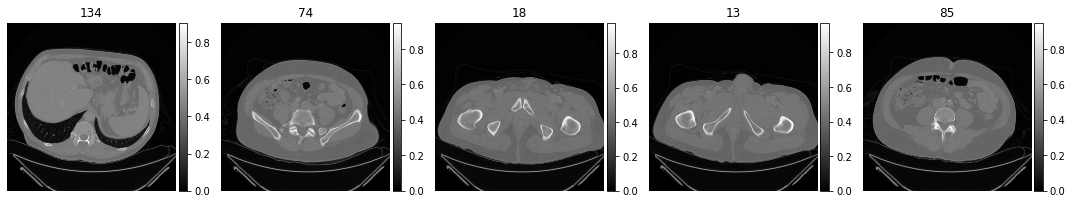

In [17]:
p_id = np.random.choice(list(images.keys()), 1)[0]
idx = np.random.randint(0, images.get(p_id).shape[0], size=5)

# visualize
img_examples = [e for e in images.get(p_id)[idx, ...]]
ne.plot.slices(img_examples, cmaps=['gray'], do_colorbars=True, titles=idx, imshow_args=[{'origin':'lower'}]);

---

## dataloader


In [18]:
def data_generator(patients, bs, patient_id=None, slice_ids=[]):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 1], fixed image [bs, H, W, 1]
    outputs: moved image [bs, H, W, 1], zero-gradient [bs, H, W, 2]
    """
    
    if len(slice_ids) != 0:
        bs = len(slice_ids)
    
    # extract data shape and dimension
    vol_shape = list(patients.values())[0].shape[1:] 
    ndims = len(vol_shape)
    
    # prepare a zero array the size of the deformation
    zero_phi = np.zeros([bs, *vol_shape, ndims])
    
    while True:
        if patient_id is None:
            patient_id = np.random.choice(list(patients.keys()), 1)[0]
        patient = np.array(patients.get(patient_id))

        if len(slice_ids) == 0:
            slice_ids = np.random.randint(0, patient.shape[0] - 1, size=bs)
        slice_ids = np.array(slice_ids)

        moving_images = patient[slice_ids, ..., np.newaxis]
        fixed_images = patient[slice_ids + 1, ..., np.newaxis]
        inputs = [moving_images, fixed_images]
        
        # prepare outputs (the 'true' moved image)
        # we also wish to penalize the deformation field. 
        outputs = [fixed_images, zero_phi]
        
        yield (inputs, outputs)

# Args

In [25]:
class Args():
    def __init__(self):        
        self.lr = 0.001
        self.epochs = 10
        self.bs = 16       
        self.loss = 'mse' 
        self.load_model = False
        self.initial_epoch = 0 
        self.int_steps = 7 
        self.int_downsize = 2 
        self.model_dir = './trained-models/torch/1/'
        
args = Args()

In [ ]:
os.makedirs(args.model_dir, exist_ok=False)

FileExistsError: ignored

# Run

## loss

In [27]:
if args.loss == 'ncc':
    sim_loss_func = vxm.losses.NCC().loss
elif args.loss == 'mse':
    sim_loss_func = vxm.losses.MSE().loss
else:
    raise ValueError('Image loss should be "mse" or "ncc", but found "%s"' % args.image_loss)

## dataloader

In [ ]:
# # needed for smooth_loss
# zero_phi = zero_phi = torch.zeros(1, (512, 512), 2) # (batch_size, vol_shape, ndims)
# zero_phi = zero_phi.to(device).float().permute(0, 3, 1, 2)

## model

In [28]:
enc_nf = [16, 32, 32, 32]
dec_nf = [32, 32, 32, 32, 32, 16, 16]

if args.load_model:
    model = vxm.networks.VxmDense.load(args.load_model, device)
else:
    model = vxm.networks.VxmDense(
        inshape=(512, 512),
        nb_unet_features=[enc_nf, dec_nf],
        int_steps=args.int_steps,
        int_downsize=args.int_downsize
    )

model.to(device)
_ = model.train()

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

## train

In [30]:
loss_history = []

for epoch in range(args.initial_epoch, args.epochs):

    # save model checkpoint
    if epoch + 1 % 50 == 0:
        model.save(os.path.join(args.model_dir, '%04d.pt' % epoch))

    epoch_loss = 0    
    volume_count = 0
    epoch_start_time = time.time()        

    for p_id, p_imgs in images.items():
        volume_loss = 0        
        a = torch.tensor(p_imgs).unsqueeze(1).to(device).float()                
        print(a.shape)        
        
        volume_slices = 0
        for i in range((p_imgs.shape[0] - 1) // args.bs):            
            #shape = (bs, 1, W, H)
            # moving_img = torch.tensor(p_imgs[i]).unsqueeze(0).unsqueeze(0).to(device).float()        
            # fixed_img = torch.tensor(p_imgs[i + 1]).unsqueeze(0).unsqueeze(0).to(device).float()                
            moving_img = a[i*args.bs: (i+1) * args.bs]
            fixed_img = a[i*args.bs + 1 : (i+1) * args.bs + 1]
        
            # predict
            moved_img, flow = model(moving_img, fixed_img, registration=True)        

            # calculate loss                
            loss = sim_loss_func(fixed_img, moved_img)

            # backpropagate and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            volume_loss += loss * args.bs
            volume_slices += args.bs
        
        epoch_loss += volume_loss / volume_slices 
        volume_count += 1      

    # print epoch info  
    msg = 'epoch %d/%d, ' % (epoch + 1, args.epochs)
    msg += 'loss= %.4e, ' % (epoch_loss / volume_count)
    msg += 'time= %.4f, ' % (time.time() - epoch_start_time)
    print(msg, flush=True)

    loss_history.append(epoch_loss / volume_count)

# final model save
model.save(os.path.join(args.model_dir, '%04d.pt' % args.epochs))

torch.Size([90, 1, 512, 512])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


torch.Size([97, 1, 512, 512])
torch.Size([152, 1, 512, 512])


KeyboardInterrupt: ignored

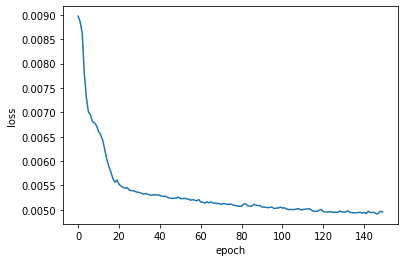

In [ ]:
plt.plot(loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Evaluate

In [ ]:
load_model = './trained-models/torch/with_labels/0150.pt'
model = vxm.networks.VxmDense.load(load_model, device)
model.to(device)
model.eval();

In [ ]:
val_dataloader, _ = get_dataloader(images, labels, 1)

dice_loss_func = vxm.losses.Dice().loss

In [ ]:
zero = torch.zeros(1, 1, 256, 256)
one = torch.ones(1, 1, 256, 256)

In [ ]:
dice_score = []

for inputs in val_dataloader:

    [moving_img, fixed_img, moving_lb, fixed_lb] = [d.to(device).float().permute(0, 3, 1, 2) for d in inputs]  
  
    bs = moving_img.shape[0]

    with torch.no_grad():
        # predict
        moved_img, flow = model(moving_img, fixed_img, registration=True)
        moved_lb = model.transformer(moving_lb, flow)
        fixed_lb = torch.where(fixed_lb > 0, one, zero)
        moved_lb = torch.where(moved_lb > 0, one, zero)
        dice_score.append((-dice_loss_func(fixed_lb, moved_lb)).detach().cpu().numpy())

print('mean:', np.mean(dice_score), 'std:', np.std(dice_score))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


mean: 0.8887968 std: 0.101618975


# Visualize

In [ ]:
def show(patients, patient_id=None, slice_ids=[]):

    if patient_id is None:
        patient_id = np.random.choice(list(patients.keys()), 1)[0]
    patient = np.array(patients.get(patient_id))
    if len(slice_ids) == 0:
        slice_ids = np.random.randint(0, patient.shape[0] - 1, size=1)

    for i in slice_ids:
        val_generator = data_generator(patients, bs=1, patient_id=patient_id, slice_ids=[i])
        inputs, _ = next(val_generator)
        input_moving, input_fixed = [torch.from_numpy(d).to(device).float().permute(0, 3, 1, 2) for d in inputs]
        moved, warp = model(input_moving, input_fixed, registration=True)

        input_moving = input_moving.detach().cpu().numpy().squeeze(0)
        input_fixed = input_fixed.detach().cpu().numpy().squeeze(0)
        moved = moved.detach().cpu().numpy().squeeze(0)
        warp = warp.detach().cpu().numpy().squeeze(0)

        # visualize
        images = [img[0, :, :] for img in [input_moving, input_fixed, moved, warp]] 
        titles = ['moving', 'fixed', 'moved', 'flow']
        ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True, imshow_args=[{'origin':'lower'}]);

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


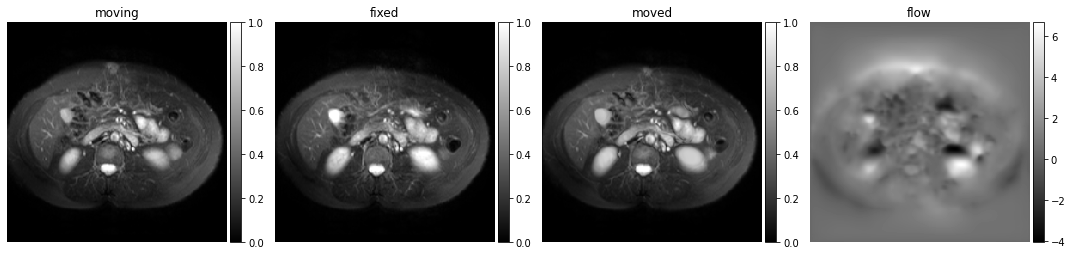

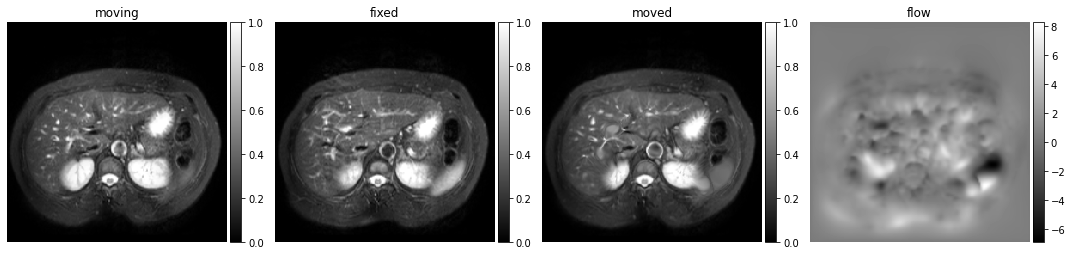

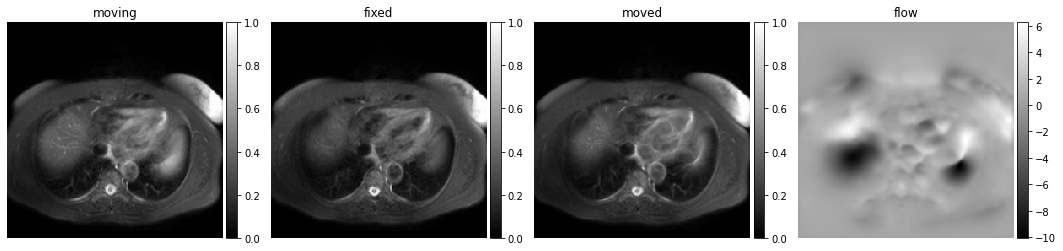

----------------------------------------------------------------------


In [ ]:
slice_ids = [5, 15, 25]
show(images, patient_id=5, slice_ids=slice_ids)